In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=20230101&end_date=20230901&station=9414290&product=hourly_height&datum=MLLW&time_zone=lst&units=metric&application=DataAPI_Sample&format=csv')
data.index = pd.to_datetime(data['Date Time'], format="%Y-%m-%d %H:%M")
print(data.head())
print(data.shape)

                            Date Time   Water Level   Sigma   I   L 
Date Time                                                           
2023-01-01 00:00:00  2023-01-01 00:00         0.798   0.039   0    0
2023-01-01 01:00:00  2023-01-01 01:00         0.801   0.044   0    0
2023-01-01 02:00:00  2023-01-01 02:00         0.955   0.046   0    0
2023-01-01 03:00:00  2023-01-01 03:00         1.152   0.043   0    0
2023-01-01 04:00:00  2023-01-01 04:00         1.440   0.032   0    0
(5824, 5)


In [4]:
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)
        

In [5]:
WINDOW_SIZE = 10
X, y = df_to_X_y(water_level, WINDOW_SIZE)
print(X.shape)
print(y.shape)

(5814, 10, 1)
(5814,)


In [6]:
X_train, y_train = X[:4500], y[:4500]
X_val, y_val = X[4500:], y[4500:]
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(4500, 10, 1) (4500,)
(1314, 10, 1) (1314,)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [8]:
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

2023-09-07 14:06:18.892744: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [10]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=25, callbacks = [cp])

2023-09-07 14:06:20.014589: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
141/141 [==============================] - 6s 20ms/step - loss: 0.8401 - root_mean_squared_error: 0.9166 - val_loss: 0.4159 - val_root_mean_squared_error: 0.6449


2023-09-07 14:06:30.453741: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/25
141/141 [==============================] - 2s 12ms/step - loss: 0.3610 - root_mean_squared_error: 0.6008 - val_loss: 0.3346 - val_root_mean_squared_error: 0.5784


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/25
141/141 [==============================] - 2s 17ms/step - loss: 0.2898 - root_mean_squared_error: 0.5384 - val_loss: 0.2696 - val_root_mean_squared_error: 0.5192


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/25
141/141 [==============================] - 2s 12ms/step - loss: 0.2287 - root_mean_squared_error: 0.4783 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4515


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/25
141/141 [==============================] - 2s 14ms/step - loss: 0.1647 - root_mean_squared_error: 0.4058 - val_loss: 0.1331 - val_root_mean_squared_error: 0.3648


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/25
141/141 [==============================] - 2s 13ms/step - loss: 0.1069 - root_mean_squared_error: 0.3270 - val_loss: 0.0803 - val_root_mean_squared_error: 0.2834


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/25
141/141 [==============================] - 2s 13ms/step - loss: 0.0682 - root_mean_squared_error: 0.2611 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2246


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/25
141/141 [==============================] - 2s 12ms/step - loss: 0.0437 - root_mean_squared_error: 0.2090 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1729


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/25
141/141 [==============================] - 2s 13ms/step - loss: 0.0294 - root_mean_squared_error: 0.1714 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1512


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/25
141/141 [==============================] - 2s 15ms/step - loss: 0.0245 - root_mean_squared_error: 0.1565 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1438


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 11/25
141/141 [==============================] - 2s 18ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1406


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 12/25
141/141 [==============================] - 2s 14ms/step - loss: 0.0207 - root_mean_squared_error: 0.1440 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1344


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 13/25
141/141 [==============================] - 2s 14ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1298


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 14/25
141/141 [==============================] - 1s 10ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1267


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 15/25
141/141 [==============================] - 2s 12ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1221


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 16/25
141/141 [==============================] - 1s 10ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1199


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 17/25
141/141 [==============================] - 1s 11ms/step - loss: 0.0150 - root_mean_squared_error: 0.1223 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1138


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 18/25
141/141 [==============================] - 2s 14ms/step - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1161
Epoch 19/25
141/141 [==============================] - 2s 11ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 20/25
141/141 [==============================] - 1s 10ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1035


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 21/25
141/141 [==============================] - 2s 11ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1012


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 22/25
141/141 [==============================] - 2s 15ms/step - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0945


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 23/25
141/141 [==============================] - 2s 14ms/step - loss: 0.0101 - root_mean_squared_error: 0.1004 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0907


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 24/25
141/141 [==============================] - 2s 12ms/step - loss: 0.0093 - root_mean_squared_error: 0.0966 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0869


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 25/25
141/141 [==============================] - 2s 13ms/step - loss: 0.0085 - root_mean_squared_error: 0.0920 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [11]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

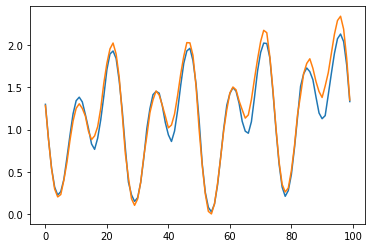

In [14]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Train Actuals':y_train})
plt.figure()
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Train Actuals'][:100])
plt.show()

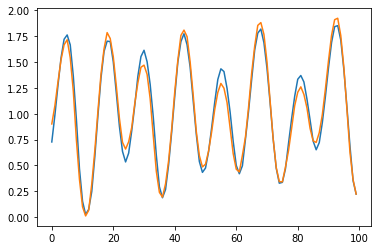

In [15]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Val Actuals':y_val})
plt.figure()
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Val Actuals'][:100])
plt.show()